In [9]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df["A"]=df[["Annual Income (k$)"]]
df["B"]=df[["Spending Score (1-100)"]]

In [16]:
X=df[["A","B"]]
X.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
from sklearn.cluster import KMeans
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

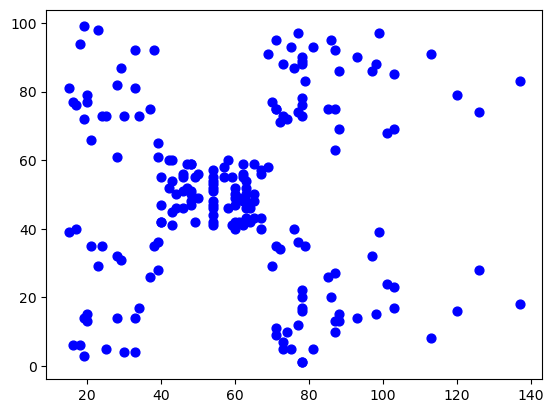

In [18]:
plt.scatter(X["A"], X["B"], s = 40, c = 'b')
plt.show

In [21]:
Kmean = KMeans(n_clusters = 7)
Kmean.fit(X)

centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[ 78.89285714  17.42857143]
 [ 54.61538462  50.02564103]
 [108.18181818  82.72727273]
 [ 26.30434783  20.91304348]
 [ 25.72727273  79.36363636]
 [109.7         22.        ]
 [ 78.03571429  81.89285714]]


In [23]:
clusters=Kmean.fit_predict(X)
df["label"]=clusters
df.head(200)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,3
1,2,Male,21,15,81,15,81,4
2,3,Female,20,16,6,16,6,3
3,4,Female,23,16,77,16,77,4
4,5,Female,31,17,40,17,40,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,120,79,2
196,197,Female,45,126,28,126,28,1
197,198,Male,32,126,74,126,74,2
198,199,Male,32,137,18,137,18,1


In [25]:
col=['yellow','green','black','blue','orange']

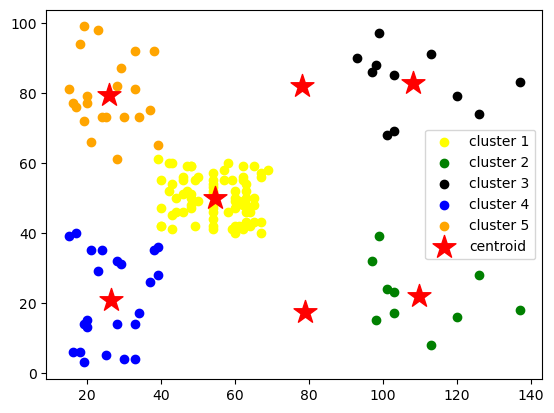

In [28]:
for i in range(5):
    a = col[i]
    plt.scatter(df.A[df.label == i], df.B[df.label == i], c=a, label=f'cluster {i+1}')

# Scatter plot for the centroids
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r', label='centroid')

# Show legend
plt.legend()

# Show plot
plt.show()


In [29]:
X1=X.loc[:,["A","B"]].values

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

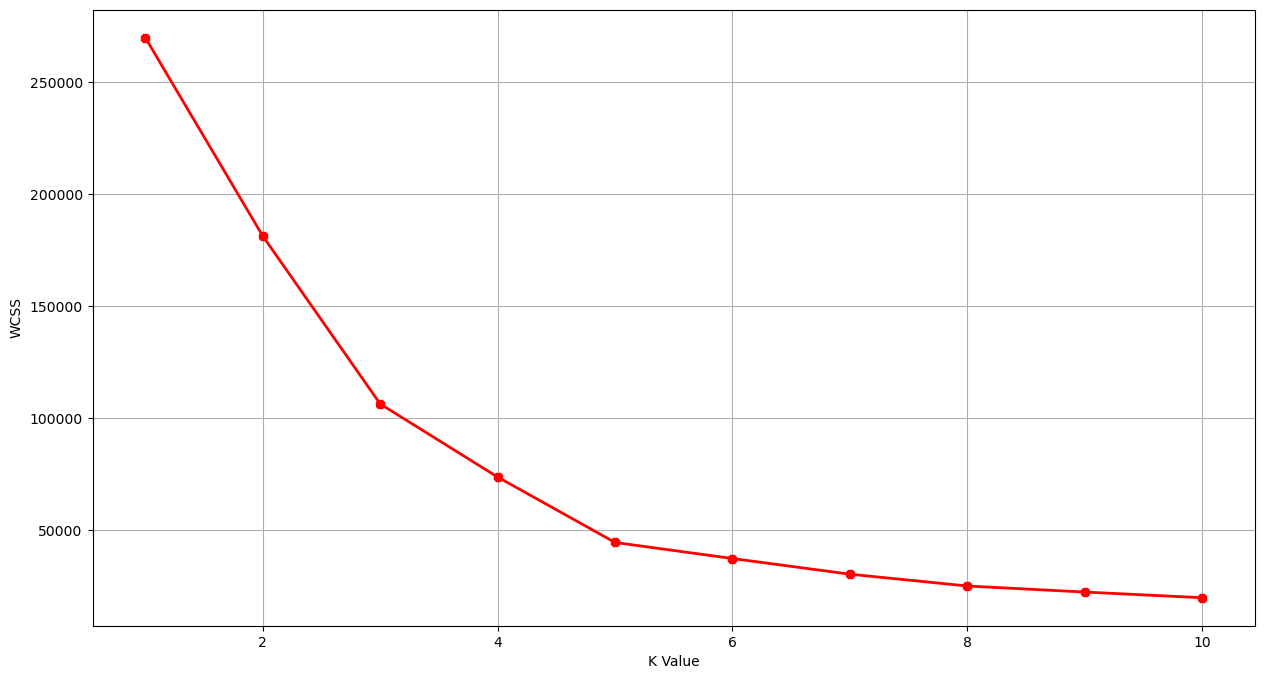

In [31]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init= "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()